<a href="https://colab.research.google.com/github/FelixEbenezer/NLP_Spacy_Python/blob/main/NLP_Spacy_Analyse_Sentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pour ce projet, on va utiliser 100% spacy cad tant en pre traitement comme en construction de modeles CNN car il y a ceux qui utilisent spacy que en pre traitement et tensor flow ou sklearn pour la construction du modele.

In [ ]:
#Convient utiliser la version 2.2.3 de spacy pour le fonctionnement de certaines methodes qui ne fonctionnent pas bien dans une version differente de celle si
!pip install spacy==2.2.3

In [ ]:
import spacy
spacy.__version__

'2.2.3'

In [ ]:
!python -m spacy download fr_core_news_sm

     |████████████████████████████████| 14.7 MB 7.2 MB/s 
  Created wheel for fr-core-news-sm: filename=fr_core_news_sm-2.2.5-py3-none-any.whl size=14727025 sha256=518b6b89452457faf6aca0f87b00942c516975af6c69589871f682b4280f1d16
  Stored in directory: /tmp/pip-ephem-wheel-cache-6r2d_apn/wheels/c9/a6/ea/0778337c34660027ee67ef3a91fb9d3600b76777a912ea1c24
Successfully built fr-core-news-sm
  Attempting uninstall: fr-core-news-sm
    Found existing installation: fr-core-news-sm 3.2.0
    Uninstalling fr-core-news-sm-3.2.0:
      Successfully uninstalled fr-core-news-sm-3.2.0
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')


In [ ]:
pln = spacy.load('fr_core_news_sm')
pln

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import string
import random 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_immersion.csv', sep='\t', header=0, index_col=None)

In [ ]:
df

,text,clean_text,label,length
0,"Allez, on remet ça !\n\nLONGUE VIE A CE TOPIC",Allez on remet ça LONGUE VIE A CE TOPIC,ados,9
1,oui,oui,ados,1
2,c'est un nouveau départ pour le forum,c'est un nouveau départ pour le forum,ados,7
3,On prend les mêmes et on recommence,On prend les mêmes et on recommence,ados,7
4,"y'avait pas une majuscule à ""nuit"" ?",y'avait pas une majuscule à `` nuit '',ados,8
...,...,...,...,...
385519,heu on a t'as deja repondu ailleurt il me semb...,heu on a t'as deja repondu ailleurt il me semb...,adult,20
385520,En réponse à FHL44\nheu on a t'as deja repondu...,En réponse à FHL44 heu on a t'as deja repondu ...,adult,54
385521,"Coucou tout le monde!\nAlors voila,hier soir j...",Coucou tout le monde Alors voila hier soir j'a...,adult,123
385522,"concernant le saignement et la douleur, on est...",concernant le saignement et la douleur on est ...,adult,72


In [ ]:
df = df.drop(['text', 'length'], axis=1)

In [ ]:
df_a = df

In [ ]:
df_t = pd.concat([df[df['label']=='ados'][:100], df[df['label']=='adult'][0:100]])

In [ ]:
df_teste = pd.concat([df[df['label']=='adult'][:100], df[df['label']=='ados'][0:100]])

In [ ]:
df_teste.sample(200)

,clean_text,label
66,Moi bon bah voilà on y est ... La fameuse date...,ados
20,j'avais réalisé une fois c'était un dixième du...,ados
222996,Oui j'ai pensé la même chose mais bon hein j'a...,adult
10,FEO,ados
222922,Bonjour à tous J'ai besoin de parler ... oui j...,adult
...,...,...
222965,Bonsoir Éloigner votre fils de ce garçon est l...,adult
46,Salut Je sais que ça fait longtemps mais je vo...,ados
59,... Je suis entièrement d'accord avec toi quan...,ados
45,Bonjour si cela atteint un haut point essaye d...,ados


In [ ]:
df_t.sample(200)

,clean_text,label
68,Oyé ... K Bientôt un an que le temps passe vit...,ados
76,A Je t'ai envoyé une demande d'ami mais je sai...,ados
73,B Tu y as accès sur mon autre compte,ados
222999,c'est normal qu'un gars de 19 ans aime une fil...,adult
222960,En réponse à Chi49yh Bonjour à toutes J'ai cru...,adult
...,...,...
60,Je suis pressé de te revoir J'aimerais qu'on r...,ados
222974,En réponse à Mellebulles Bonsoir Isa Bonsoir M...,adult
222934,bonjour Puce ton message m'agace c'est dit gen...,adult
222937,bonjour il y a un article assez simple et clai...,adult


In [ ]:
for n in df_t.loc[60, ['clean_text']]:
  print(n)

presser revoir aimer reparle tête tête compromettre moment forum malheureusement vide ici


In [ ]:
df_t['clean_text'][60]

'presser revoir aimer reparle tête tête compromettre moment forum malheureusement vide ici'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


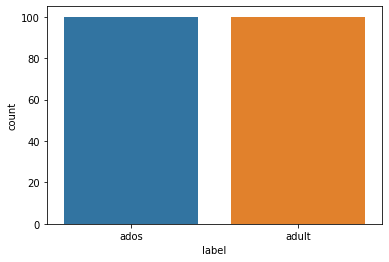

In [ ]:
sns.countplot(df_t['label'])

# Etapa 3: Função para pré-processamento dos textos

In [ ]:
ponc = string.punctuation
ponc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from spacy.lang.fr.stop_words import STOP_WORDS
stop_words = STOP_WORDS
print(stop_words)

{'proche', 'stop', 'chut', 'on', 'puis', 'vont', 'anterieur', 'l’', 'leurs', 'longtemps', 'semblent', 'malgré', 'troisième', 'bigre', 'dix-neuf', 'dix-huit', 'celles', 'clic', 'seul', 'procedant', 'autrement', 'cet', 'quelque', 'derrière', 'encore', 'hormis', 'hors', 'suffisante', 'pres', 'ses', 'le', 'a', "m'", 'néanmoins', 'maint', 'peuvent', 'ceux-là', 'feront', 'font', 'elle', 'même', 'vifs', 'lui-meme', 'effet', 'tenir', 'aucun', 'était', 'ceci', 'troisièmement', 'dit', 'différentes', 'siens', 'duquel', 'beaucoup', 'suivre', 'vous', 'tenant', 'comment', 'possessifs', 'mêmes', 'holà', 'psitt', 'pure', 'tu', 'cinquante', 'clac', 'hé', 'euh', 'o', 'differents', 'elles-mêmes', 'tels', 'probante', 'leur', 'suffisant', 'té', 'uniformement', 'vôtres', 'directe', 'crac', 'étais', 'ni', 'trop', 'fait', 'particulière', 'vais', 'deuxièmement', "j'", 'sixième', 'pourquoi', 'mes', 'laquelle', 'possessif', 'sur', 'vé', 'celle-là', 'te', 'celles-ci', 'dix-sept', 'plein', 'pas', 'seulement', 'tel

In [ ]:
def pretraitement(texte):
  doc = pln(texte.lower())
  phrase = []
  for k, mot in enumerate(doc):   #j ai utilisé enumerate juste pour créer un iterateur
    if mot.text not in ponc and mot.text not in stop_words and not mot.is_digit:
      phrase.append(mot.lemma_)
  phrase = ' '.join([str(mot) for mot in phrase])
  return phrase


In [ ]:
teste = 'Je suis en train d´apprendre, 12 NLP courses à Reims chaque jour!'
print(pretraitement(teste))

train d´apprendr nlp course reim jour


In [ ]:
d = pln(teste)
d[3].is_stop

False

In [ ]:
"Appliquer le pretraitement sur la base dataframe specifiquement sur la colonne clean_text"

'Appliquer le pretraitement sur la base dataframe specifiquement sur la colonne clean_text'

In [ ]:
df_t['clean_text'] = df_t['clean_text'].apply(pretraitement)

In [ ]:
df_t

,clean_text,label
0,aller remettre long vie topic,ados
1,oui,ados
2,départ forum,ados
3,prendre recommence,ados
4,y' majuscule nuit '',ados
...,...,...
223017,les.hormone garçon normal voir nu to mari savoir,adult
223018,y post sujet ici faire recherche plupart ado r...,adult
223019,normal comportement âge falloir expliquer cerv...,adult
223020,être issu lignée consanguain adam eve gosse ob...,adult


# TRAITEMENT DE CLASSE

In [ ]:
df_final = []
for texto, emocao in zip(df_t['clean_text'], df_t['label']):
  #print(texto, emocao)
  if emocao == 'ados':
    dic = ({'ADOS': True, 'ADULT': False})
  elif emocao == 'adult':
    dic = ({'ADOS': False, 'ADULT': True})

  df_final.append([texto, dic.copy()])

In [ ]:
df_final[0:5]

[['aller remettre long vie topic', {'ADOS': True, 'ADULT': False}],
 ['oui', {'ADOS': True, 'ADULT': False}],
 ['départ forum', {'ADOS': True, 'ADULT': False}],
 ['prendre recommence', {'ADOS': True, 'ADULT': False}],
 ["y' majuscule nuit ''", {'ADOS': True, 'ADULT': False}]]

In [ ]:
for n in df_final[0:5]:
  print(f'n = {n}')
  for n1 in n:
    if isinstance(n1, dict):
      print(f'n1 = {n1}')

n = ['aller remettre long vie topic', {'ADOS': True, 'ADULT': False}]
n1 = {'ADOS': True, 'ADULT': False}
n = ['oui', {'ADOS': True, 'ADULT': False}]
n1 = {'ADOS': True, 'ADULT': False}
n = ['départ forum', {'ADOS': True, 'ADULT': False}]
n1 = {'ADOS': True, 'ADULT': False}
n = ['prendre recommence', {'ADOS': True, 'ADULT': False}]
n1 = {'ADOS': True, 'ADULT': False}
n = ["y' majuscule nuit ''", {'ADOS': True, 'ADULT': False}]
n1 = {'ADOS': True, 'ADULT': False}


# CREATION DU MODELE

In [ ]:
model = spacy.blank('fr')
categorias = model.create_pipe("textcat")
#categorias = model.add_pipe("textcat")
categorias.add_label("ADOS")
categorias.add_label("ADULT")
model.add_pipe(categorias)
historico = []

In [ ]:
model.begin_training()
for epoca in range(100):
  random.shuffle(df_final)
  losses = {}
  for batch in spacy.util.minibatch(df_final, 30):
    textos = [model(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    model.update(textos, annotations, losses=losses)
  if epoca % 10 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 1.5361966004823202e-09}
{'textcat': 1.4705013387517063e-09}
{'textcat': 2.382223014407714e-07}
{'textcat': 7.499116572162734e-08}
{'textcat': 4.851622525947619e-08}
{'textcat': 4.0913174514933814e-08}
{'textcat': 3.065513820565968e-08}
{'textcat': 2.6246865347800963e-08}
{'textcat': 2.043318869660027e-08}
{'textcat': 2.6263891284017404e-08}


In [ ]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [ ]:
historico_loss = np.array(historico_loss)
historico_loss

array([4.85692528e-03, 1.36518117e-07, 8.63827283e-07, 1.53619660e-09,
       1.47050134e-09, 2.38222301e-07, 7.49911657e-08, 4.85162253e-08,
       4.09131745e-08, 3.06551382e-08, 2.62468653e-08, 2.04331887e-08,
       2.62638913e-08])

Text(0, 0.5, 'Erro')

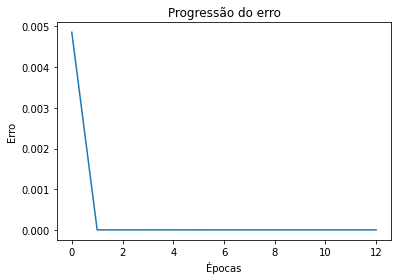

In [ ]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [ ]:
model.to_disk("modelo")

# TESTER NOTRE MODELE AVEC UNE PHRASE

In [ ]:
#Chager le modele
model_charge = spacy.load('modelo')
model_charge

In [ ]:
texte_ado = 'On prend les mêmes et on recommence'

In [ ]:
texte_ado = pretraitement(texte_ado)
texte_ado

'prendre recommence'

In [ ]:
prevision = model_charge(texte_ado)
prevision

prendre recommence

In [ ]:
prevision.cats

{'ADOS': 0.9989500641822815, 'ADULT': 0.00044213986257091165}

In [ ]:
texto_adult = 'concernant le saignement et la douleur on est'
previsao = model_charge(pretraitement(texto_adult))
previsao.cats

{'ADOS': 0.33282846212387085, 'ADULT': 0.6150592565536499}

# EVALUATION DU MODELE

EVALUATION DE LA BASE TRAINING

In [ ]:
previsions = []
for texte in df_t['clean_text']:
  prevision = model_charge(texte)
  previsions.append(prevision.cats)

In [ ]:
print(previsions)

[{'ADOS': 0.9995085000991821, 'ADULT': 0.00032298723817802966}, {'ADOS': 0.995904266834259, 'ADULT': 0.002755984663963318}, {'ADOS': 0.9993472695350647, 'ADULT': 0.00022656827059108764}, {'ADOS': 0.9989500641822815, 'ADULT': 0.00044213986257091165}, {'ADOS': 0.9987887740135193, 'ADULT': 0.0006852624355815351}, {'ADOS': 0.9988113641738892, 'ADULT': 0.000997781055048108}, {'ADOS': 0.9994457364082336, 'ADULT': 0.0003507582878228277}, {'ADOS': 0.999636173248291, 'ADULT': 0.0001811891997931525}, {'ADOS': 0.9998154044151306, 'ADULT': 0.00026296466239728034}, {'ADOS': 0.9996204376220703, 'ADULT': 0.0002636701101437211}, {'ADOS': 0.999395489692688, 'ADULT': 0.0004063547821715474}, {'ADOS': 0.9995751976966858, 'ADULT': 0.00037578484625555575}, {'ADOS': 0.9988470077514648, 'ADULT': 0.0008844027761369944}, {'ADOS': 0.999575674533844, 'ADULT': 0.0005982205038890243}, {'ADOS': 0.999687671661377, 'ADULT': 0.00035881405347026885}, {'ADOS': 0.9995115995407104, 'ADULT': 0.0002633028198033571}, {'ADOS':

In [ ]:
previsions_finales = []
for prevision in previsions:
  if prevision['ADOS'] > prevision['ADULT']:
    previsions_finales.append('ados')
  else:
    previsions_finales.append('adult')

previsions_finales = np.array(previsions_finales)

In [ ]:
print(previsions_finales)

['ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados'
 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados'
 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados'
 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados'
 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados'
 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados'
 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados'
 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados'
 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados'
 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados'
 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult'
 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult'
 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult'
 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult

In [ ]:
respostas_reais = df_t['label'].values

In [ ]:
print(respostas_reais)

['ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados'
 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados'
 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados'
 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados'
 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados'
 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados'
 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados'
 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados'
 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados'
 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados' 'ados'
 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult'
 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult'
 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult'
 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult' 'adult

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsions_finales)

1.0

In [ ]:
cm = confusion_matrix(respostas_reais, previsions_finales)
cm

array([[100,   0],
       [  0, 100]])

EVALUATION SUR LA BASE DE BASE TEST

In [ ]:
df_teste['clean_text'] = df_teste['clean_text'].apply(pretraitement)

In [ ]:
previsoes_teste = []
for texto in df_teste['clean_text']:
  #print(texto)
  previsao = model_charge(texto)
  previsoes_teste.append(previsao.cats)

In [ ]:
previsoes_final_teste = []
for previsao in previsoes_teste:
  if previsao['ADOS'] > previsao['ADULT']:
    previsoes_final_teste.append('ados')
  else:
    previsoes_final_teste.append('adult')

previsoes_final_teste = np.array(previsoes_final_teste)

In [ ]:
respostas_reais_teste = df_teste['label'].values

In [ ]:
accuracy_score(respostas_reais_teste, previsoes_final_teste)

1.0

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final_teste)
cm

array([[  0, 100],
       [100,   0]])